In [21]:
import numpy as np
import anndata as ad
import sys
import os
import torch
sys.path.insert(1, '..')
from utils import *
import warnings
warnings.filterwarnings('ignore')
from os import path

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
%reload_ext autoreload

# Subset of tissues

In [4]:
# Load data of subset of tissues 'Bladder', 'Heart', 'Kidney', 'Liver', 'Marrow', 'Thymus'
all_sub_anndata = ad.read('../dataset/subset_anndata_with_emb.h5ad')
all_sub_anndata.obs.sort_values(by="cell", inplace=True)

In [5]:
# Best hyper-parameters for clustering
metric = 'euclidean'
resolution = 1
init_pos = 'random'
use_rep = "X_enc"
n_neigh = 15
n_pcs = all_sub_anndata.obsm['X_enc'].shape[1]

In [6]:
all_sub_anndata = find_clusters(all_sub_anndata, n_pcs=n_pcs, metric=metric, resolution=resolution, init_pos = init_pos, 
                            use_rep=use_rep, n_neigh=n_neigh, seed=42, return_anndata=True)

umap_200_euclidean_1_random.png
Silhouette 0.3761715590953827
SSE 3837.4616087248523


In [7]:
all_sub_anndata.obs[['cell', 'louvain']]

,cell,louvain
5589,10X_P4_2_AAACCTGAGCTACCTA,1
5590,10X_P4_2_AAACCTGCAAGACACG,13
5591,10X_P4_2_AAACCTGCATGCCTTC,27
5592,10X_P4_2_AAACCTGGTATCTGCA,13
5593,10X_P4_2_AAACGGGTCCGCATAA,19
...,...,...
38933,10X_P7_7_TTGTAGGTCATGTAGC,11
38934,10X_P7_7_TTTACTGGTGTTGAGG,25
38935,10X_P7_7_TTTCCTCCATACCATG,4
38936,10X_P7_7_TTTGTCAGTTACCGAT,16


In [8]:
print(f"Number of Clusters for Performer embeddings: {len(all_sub_anndata.obs['louvain'].unique())}")

Number of Clusters for Performer embeddings: 35


In [9]:
sc.tl.tsne(all_sub_anndata, n_pcs=n_pcs, use_rep=use_rep, perplexity=30, early_exaggeration=12, random_state=42, metric=metric, n_jobs=10)

Performer embeddings colored by cluster


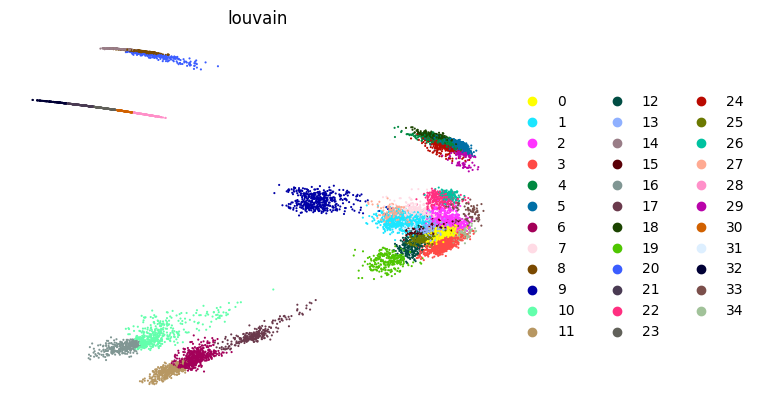

In [10]:
print("Performer embeddings colored by cluster")
sc.pl.embedding(
    all_sub_anndata,
    basis="X_enc",
    frameon=False,
    color='louvain'
)

Performer embeddings colored by cluster with tSNE


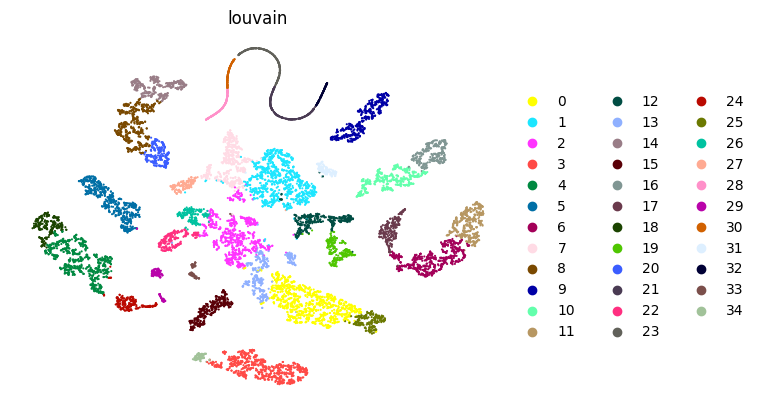

In [11]:
print("Performer embeddings colored by cluster with tSNE")
sc.pl.embedding(
    all_sub_anndata,
    basis="X_tsne",
    frameon=False,
    color='louvain'
)

Performer embeddings colored by tissue


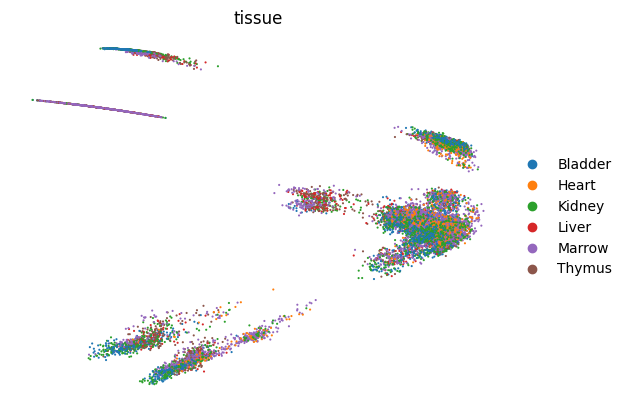

In [12]:
print("Performer embeddings colored by tissue")
sc.pl.embedding(
    all_sub_anndata,
    basis="X_enc",
    frameon=False,
    color='tissue'
)

Performer embeddings colored by tissue with tSNE


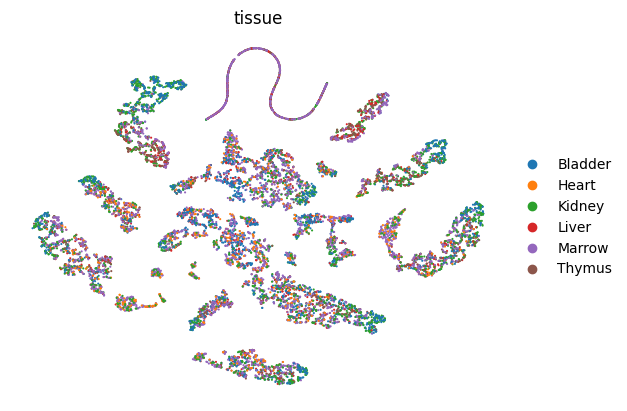

In [13]:
print("Performer embeddings colored by tissue with tSNE")
sc.pl.embedding(
    all_sub_anndata,
    basis="X_tsne",
    frameon=False,
    color='tissue'
)

Performer embeddings colored by cell ontology class


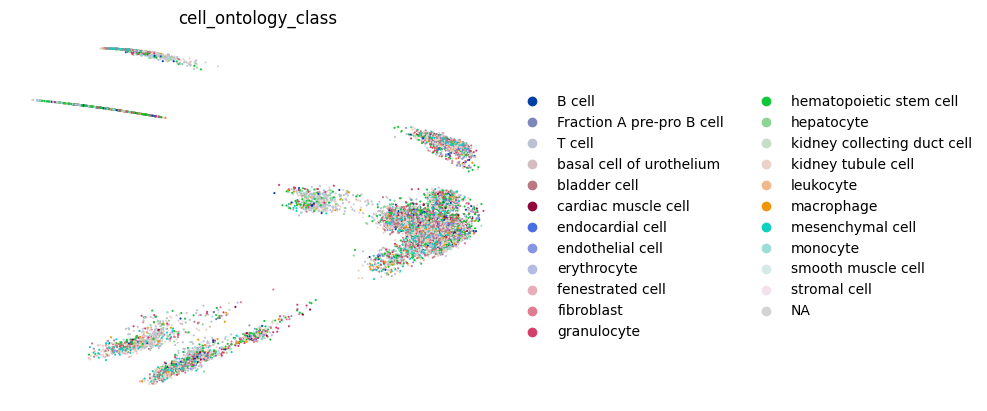

In [14]:
print("Performer embeddings colored by cell ontology class")
sc.pl.embedding(
    all_sub_anndata,
    basis="X_enc",
    frameon=False,
    color='cell_ontology_class'
)

Performer embeddings colored by cell ontology class with tSNE


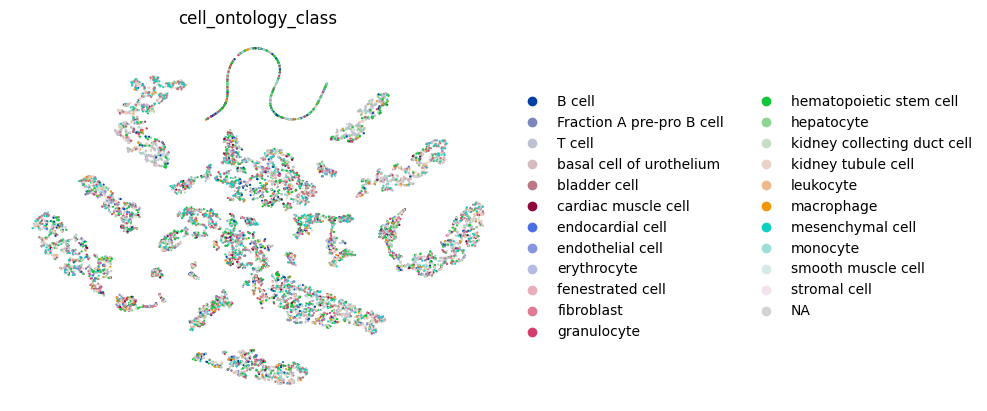

In [15]:
print("Performer embeddings colored by cell ontology class with tSNE")
sc.pl.embedding(
    all_sub_anndata,
    basis="X_tsne",
    frameon=False,
    color='cell_ontology_class'
)

Performer embeddings colored by experiment


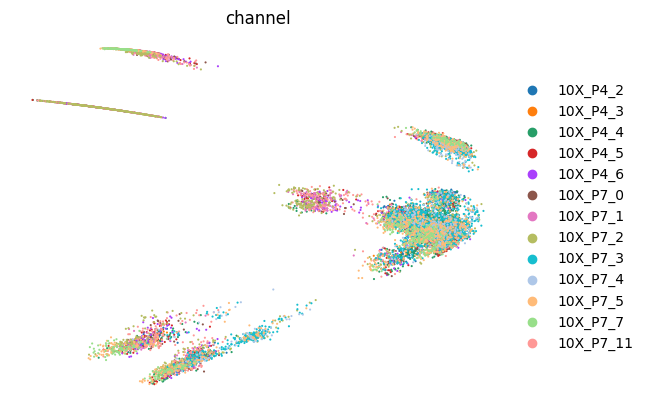

In [16]:
print("Performer embeddings colored by experiment")
sc.pl.embedding(
    all_sub_anndata,
    basis="X_enc",
    frameon=False,
    color='channel'
)

Performer embeddings colored by experiment with tSNE


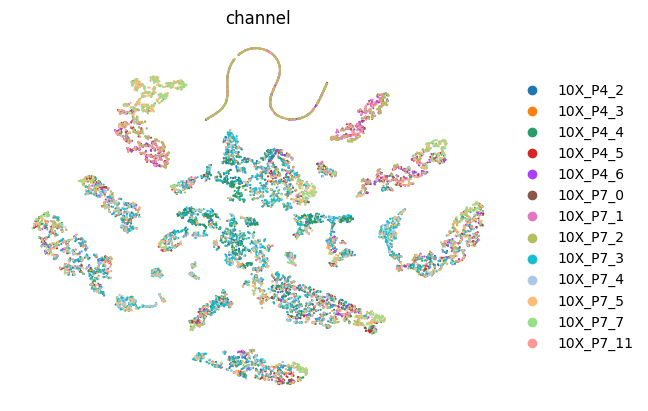

In [17]:
print("Performer embeddings colored by experiment with tSNE")
sc.pl.embedding(
    all_sub_anndata,
    basis="X_tsne",
    frameon=False,
    color='channel'
)

In [18]:
tissues_tm_to_filter = ['Bladder', 'Heart_and_Aorta', 'Kidney', 'Liver', 'Marrow', 'Thymus']
tm_filter = pd.read_csv("../dataset/subset_cluster_tabula_muris.csv")
tm_filter.sort_values(by=['cell'], inplace=True)

In [19]:
print(f"Number of Clusters from ground truth: {len(tm_filter['cluster.ids'].unique())}")

Number of Clusters from ground truth: 21


# Purity w.r.t Tabula Muris clusters

In [21]:
pur = compute_purity(adata_og = tm_filter['cluster.ids'], adata_pred = all_sub_anndata.obs['louvain'])
print(f"Purity between clusters using Performer embeddings and without embeddings: {pur}")

Purity between clusters using Performer embeddings and without embeddings: 0.17714909204270907


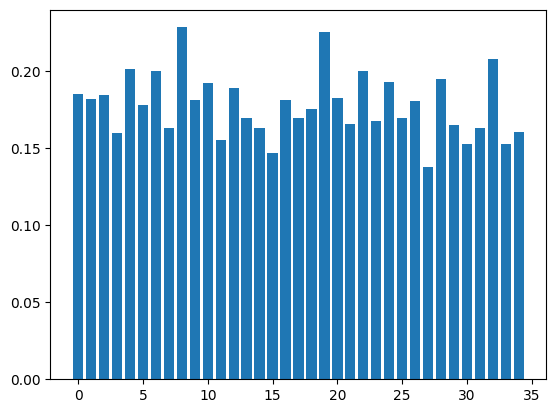

In [22]:
gen_purity_hist(tm_filter['cluster.ids'], all_sub_anndata.obs['louvain'])

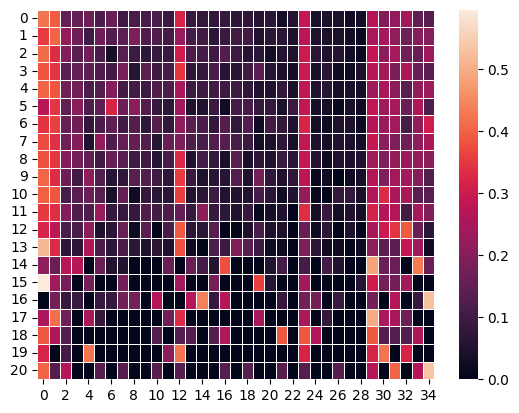

In [23]:
contingency_matrix = metrics.cluster.contingency_matrix(tm_filter['cluster.ids'], all_sub_anndata.obs['louvain'])
gen_heatmap(matrix = contingency_matrix)

# Purity w.r.t Tablua Muris cell ontology classes

In [24]:
values = tm_filter["cell_ontology_class"].unique()
d = dict((el, i) for i, el in enumerate(values))
tm_filter["cell_ontology_class" + '_discr'] = tm_filter["cell_ontology_class"].apply(lambda x: d[x])

In [25]:
pur = compute_purity(adata_og = tm_filter['cell_ontology_class_discr'], adata_pred = all_sub_anndata.obs['louvain'])
print(f"Purity between Tabula Muris cell ontology classes and Performer embeddings: {pur}")

Purity between Tabula Muris cell ontology classes and Performer embeddings: 0.18276050190943807


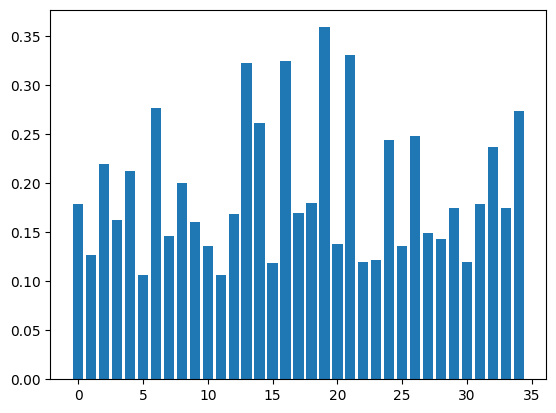

In [26]:
gen_purity_hist(tm_filter['cell_ontology_class_discr'], all_sub_anndata.obs['louvain'])

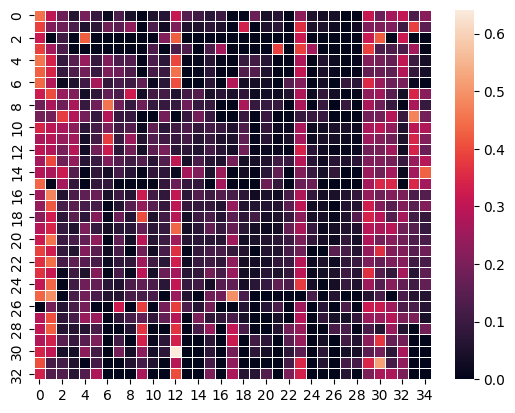

In [27]:
contingency_matrix = metrics.cluster.contingency_matrix(tm_filter['cell_ontology_class_discr'], all_sub_anndata.obs['louvain'])
gen_heatmap(matrix = contingency_matrix)

# Purity w.r.t. Tabula Muris tissues

In [28]:
values = tm_filter["tissue"].unique()
d = dict((el, i) for i, el in enumerate(values))
tm_filter["tissue" + '_discr'] = tm_filter["tissue"].apply(lambda x: d[x])

In [29]:
pur = compute_purity(adata_og = tm_filter['tissue_discr'], adata_pred = all_sub_anndata.obs['louvain'])
print(f"Purity between Tabula Muris tissues and Performer embeddings: {pur}")

Purity between Tabula Muris tissues and Performer embeddings: 0.3454913880445795


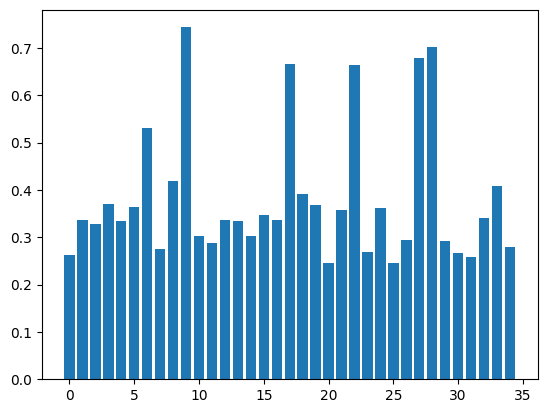

In [30]:
gen_purity_hist(tm_filter['tissue_discr'], all_sub_anndata.obs['louvain'])

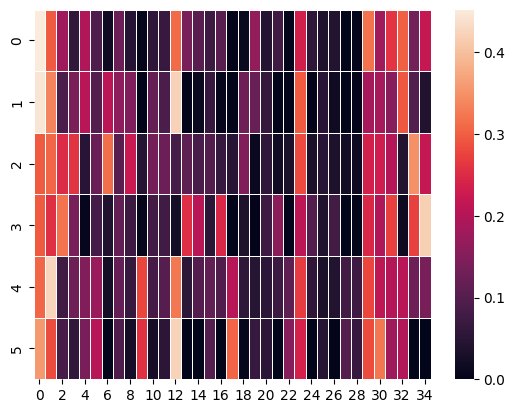

In [31]:
contingency_matrix = metrics.cluster.contingency_matrix(tm_filter['tissue_discr'], all_sub_anndata.obs['louvain'])
gen_heatmap(matrix = contingency_matrix)

# Sankey plots

In [32]:
n_performer_clust = len(all_sub_anndata.obs.louvain.unique())
jump = 3
for i in range(0, n_performer_clust, jump):
    end_idx = i+jump
    plot_sankey(tm_filter, all_sub_anndata, field_og = 'cluster.ids', field_pred = 'louvain', filename = f"sankey_plots/subset/sankey{i}_{end_idx}", from_cls = i, to_cls = end_idx)

Sankey plot w.r.t. ground truth clusters and clusters resulting from Performer

In [ ]:
plot_sankey(tm_filter, all_sub_anndata, field_og = 'cluster.ids', field_pred = 'louvain', filename = f"sankey_plots/subset/sankey{0}_{n_performer_clust}", from_cls = 0, to_cls = n_performer_clust)
# Show the figure
HTML(filename=f"sankey_plots/subset/sankey0_{n_performer_clust}.html")

Sankey plot w.r.t. ground truth tissues and clusters resulting from Performer

In [ ]:
plot_sankey(tm_filter, all_sub_anndata, field_og = 'tissue_discr', field_pred = 'louvain', filename = f"sankey_plots/subset/tissue_sankey{0}_{n_performer_clust}", from_cls = 0, to_cls = n_performer_clust)
# Show the figure
HTML(filename=f"sankey_plots/subset/tissue_sankey0_{n_performer_clust}.html")

Sankey plot w.r.t. ground truth cell ontology class and clusters resulting from Performer

In [ ]:
plot_sankey(tm_filter, all_sub_anndata, field_og = 'cell_ontology_class_discr', field_pred = 'louvain', filename = f"sankey_plots/subset/cell_ont_sankey{0}_{n_performer_clust}", from_cls = 0, to_cls = n_performer_clust)
# Show the figure
HTML(filename=f"sankey_plots/subset/cell_ont_sankey0_{n_performer_clust}.html")

---

# All tissue

In [24]:
# Load data
all_anndata = ad.read('../dataset/full_emb_anndata.h5ad')
all_anndata.obs.sort_values(by="cell", inplace=True)

In [25]:
# Best hyper-parameters for clustering
metric = 'cosine'
resolution = 1
init_pos = 'random'
n_neigh = 15
use_rep = "X_enc"
n_pcs = all_anndata.obsm['X_enc'].shape[1]

In [26]:
all_anndata = find_clusters(all_anndata, n_pcs=n_pcs, metric=metric, resolution=resolution, init_pos = init_pos, 
                            use_rep=use_rep, n_neigh=n_neigh, seed=42, return_anndata=True)

umap_200_cosine_1_random.png
Silhouette 0.32256019115448
SSE 12429.343195652416


In [6]:
all_anndata.obs[['cell', 'louvain']]

,cell,louvain
0,10X_P4_0_AAACCTGAGATTACCC,2
1,10X_P4_0_AAACCTGAGTGCCAGA,0
2,10X_P4_0_AAACCTGCAAATCCGT,23
3,10X_P4_0_AAACCTGGTAATCGTC,10
4,10X_P4_0_AAACCTGGTCCAACTA,7
...,...,...
55651,10X_P8_15_TTTGTCAGTTGTCGCG,6
55652,10X_P8_15_TTTGTCATCACGATGT,36
55653,10X_P8_15_TTTGTCATCGGCTTGG,14
55654,10X_P8_15_TTTGTCATCTTACCGC,15


In [27]:
print(f"Number of Clusters for Performer embeddings: {len(all_anndata.obs['louvain'].unique())}")

Number of Clusters for Performer embeddings: 53


In [8]:
sc.tl.tsne(all_anndata, n_pcs=n_pcs, use_rep=use_rep, perplexity=30, early_exaggeration=12, random_state=42, metric=metric, n_jobs=10)

Performer embeddings colored by cluster


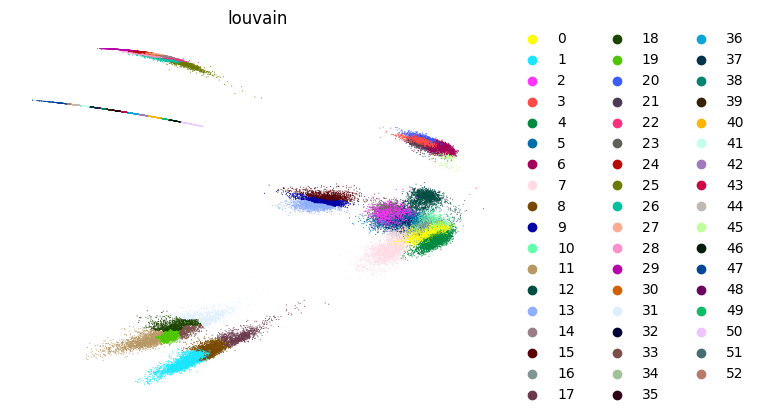

In [9]:
print("Performer embeddings colored by cluster")
sc.pl.embedding(
    all_anndata,
    basis="X_enc",
    frameon=False,
    color='louvain'
)

Performer embeddings colored by cluster with tSNE


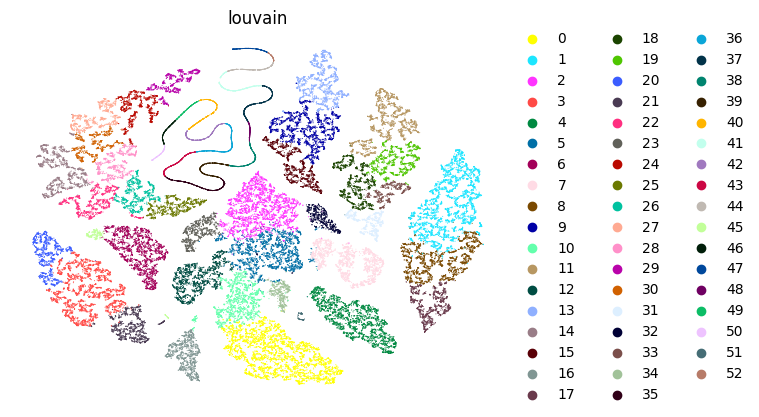

In [10]:
print("Performer embeddings colored by cluster with tSNE")
sc.pl.embedding(
    all_anndata,
    basis="X_tsne",
    frameon=False,
    color='louvain'
)

Performer embeddings colored by tissue


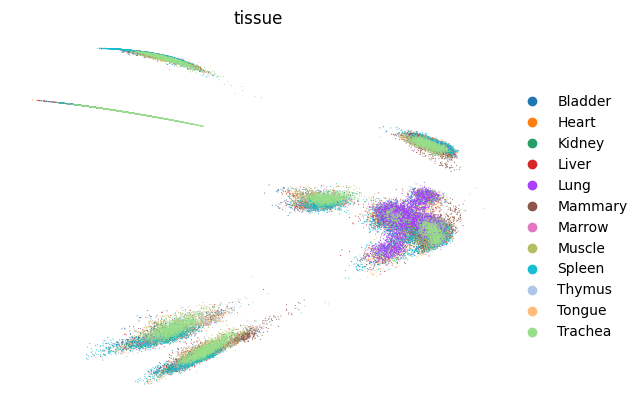

In [11]:
print("Performer embeddings colored by tissue")
sc.pl.embedding(
    all_anndata,
    basis="X_enc",
    frameon=False,
    color='tissue'
)

Performer embeddings colored by tissue with tSNE


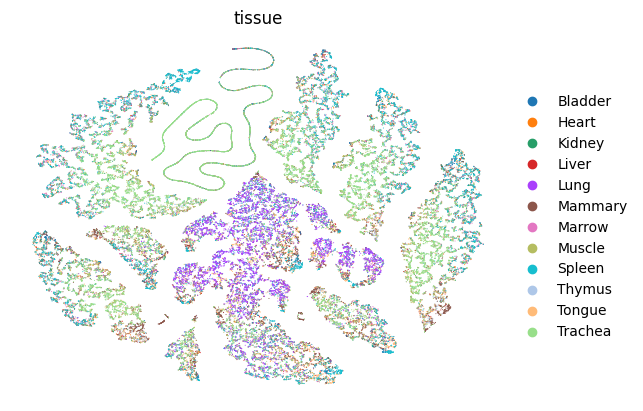

In [12]:
print("Performer embeddings colored by tissue with tSNE")
sc.pl.embedding(
    all_anndata,
    basis="X_tsne",
    frameon=False,
    color='tissue'
)

Performer embeddings colored by cell ontology class


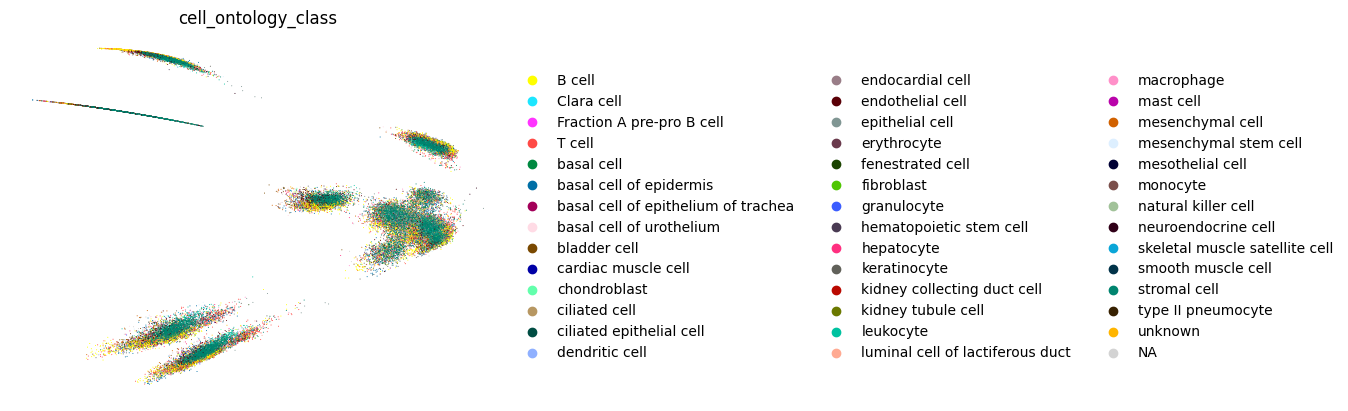

In [13]:
print("Performer embeddings colored by cell ontology class")
sc.pl.embedding(
    all_anndata,
    basis="X_enc",
    frameon=False,
    color='cell_ontology_class'
)

Performer embeddings colored by cell ontology class with tSNE


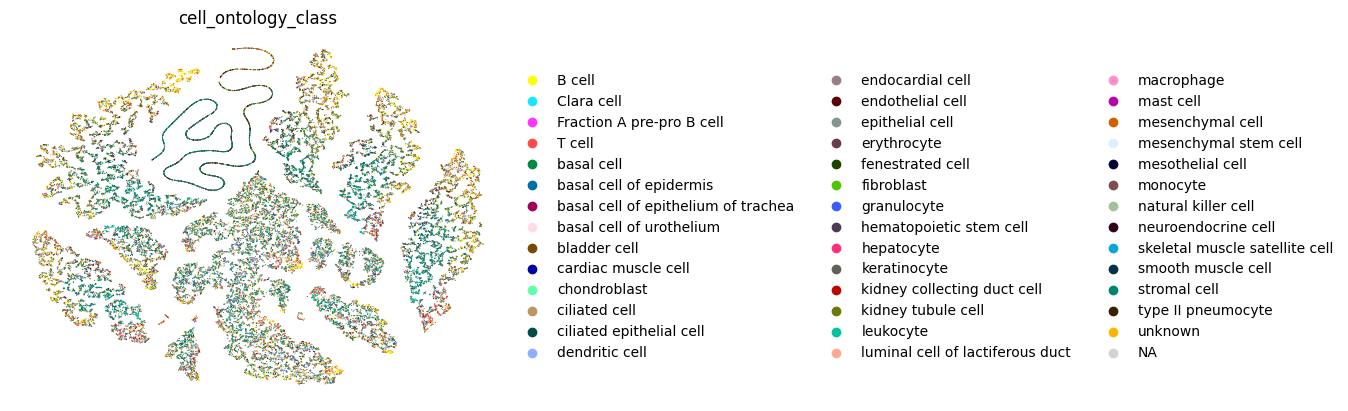

In [14]:
print("Performer embeddings colored by cell ontology class with tSNE")
sc.pl.embedding(
    all_anndata,
    basis="X_tsne",
    frameon=False,
    color='cell_ontology_class'
)

Performer embeddings colored by experiment


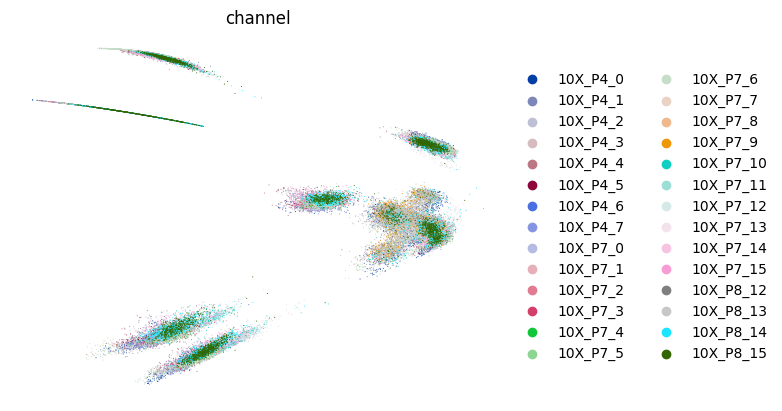

In [15]:
print("Performer embeddings colored by experiment")
sc.pl.embedding(
    all_anndata,
    basis="X_enc",
    frameon=False,
    color='channel'
)

Performer embeddings colored by experiment with tSNE


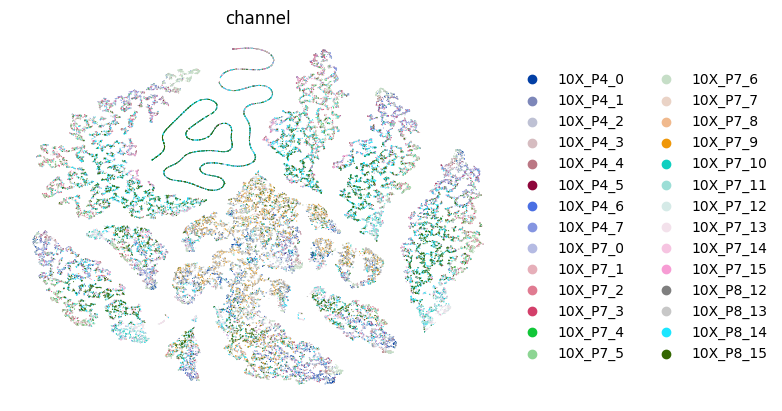

In [16]:
print("Performer embeddings colored by experiment with tSNE")
sc.pl.embedding(
    all_anndata,
    basis="X_tsne",
    frameon=False,
    color='channel'
)

In [28]:
tm = pd.read_csv('../dataset/cluster_tabula_muris.csv')
tm.sort_values(by=['cell'], inplace=True)

In [23]:
print(f"Number of Clusters from ground truth: {len(tm['cluster.ids'].unique())}")

Number of Clusters from ground truth: 29


# Purity w.r.t Tabula Muris clusters

In [24]:
pur = compute_purity(adata_og = tm['cluster.ids'], adata_pred = all_anndata.obs['louvain'])
print(f"Purity between clusters using Performer embeddings and without embeddings: {pur}")

Purity between clusters using Performer embeddings and without embeddings: 0.22409084375449187


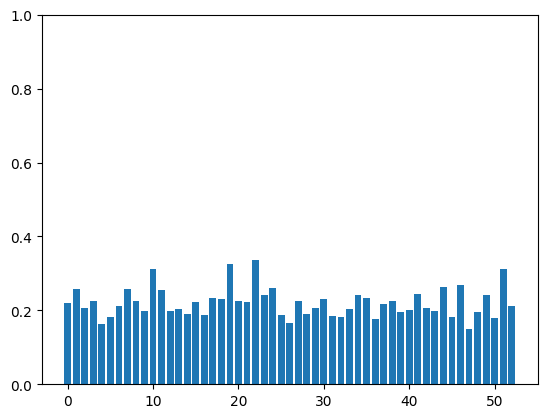

In [29]:
gen_purity_hist(tm['cluster.ids'], all_anndata.obs['louvain'])

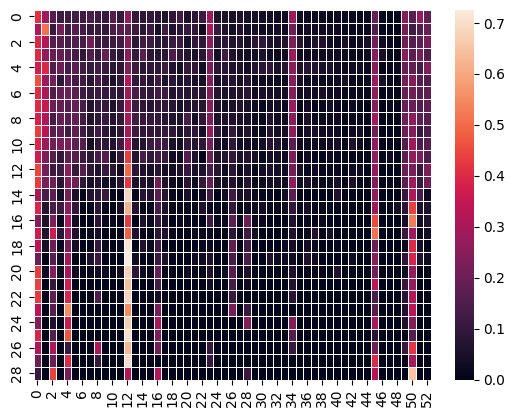

In [30]:
contingency_matrix = metrics.cluster.contingency_matrix(tm['cluster.ids'], all_anndata.obs['louvain'])
gen_heatmap(matrix = contingency_matrix)

# Purity w.r.t Tablua Muris cell ontology classes

In [30]:
values = tm["cell_ontology_class"].unique()
d = dict((el, i) for i, el in enumerate(values))
tm["cell_ontology_class" + '_discr'] = tm["cell_ontology_class"].apply(lambda x: d[x])

In [32]:
pur = compute_purity(adata_og = tm['cell_ontology_class_discr'], adata_pred = all_anndata.obs['louvain'])
print(f"Purity between Tabula Muris cell ontology classes and Performer embeddings: {pur}")

Purity between Tabula Muris cell ontology classes and Performer embeddings: 0.2280616645105649


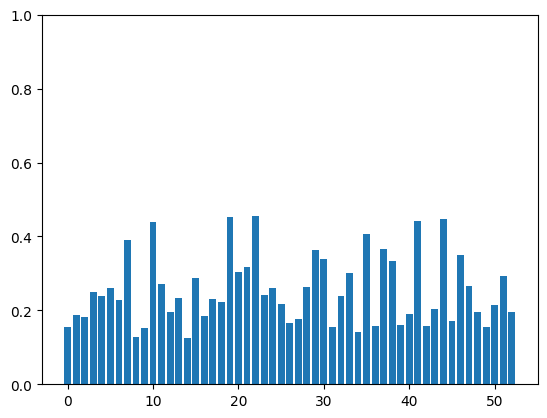

In [31]:
gen_purity_hist(tm['cell_ontology_class_discr'], all_anndata.obs['louvain'])

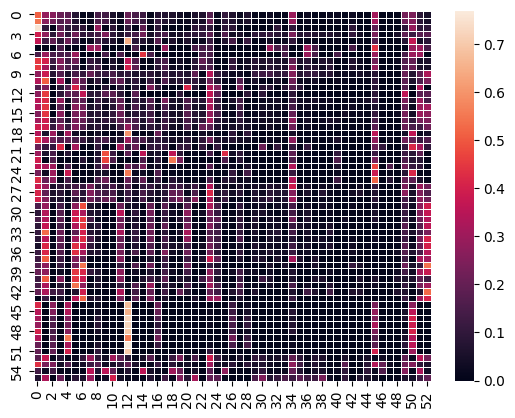

In [34]:
contingency_matrix = metrics.cluster.contingency_matrix(tm['cell_ontology_class_discr'], all_anndata.obs['louvain'])
gen_heatmap(matrix = contingency_matrix)

# Purity w.r.t. Tabula Muris tissues

In [34]:
values = tm["tissue"].unique()
d = dict((el, i) for i, el in enumerate(values))
tm["tissue" + '_discr'] = tm["tissue"].apply(lambda x: d[x])

In [35]:
pur = compute_purity(adata_og = tm['tissue_discr'], adata_pred = all_anndata.obs['louvain'])
print(f"Purity between Tabula Muris tissues and Performer embeddings: {pur}")

Purity between Tabula Muris tissues and Performer embeddings: 0.33423170907000144


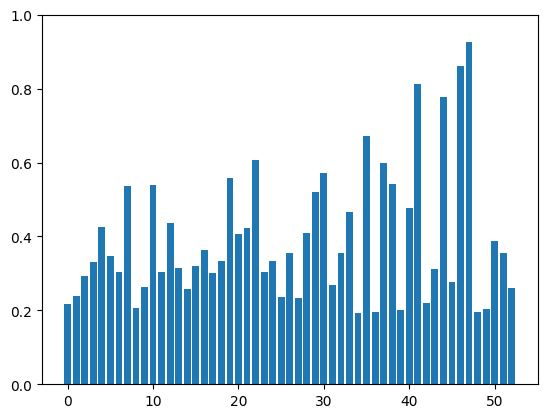

In [35]:
gen_purity_hist(tm['tissue_discr'], all_anndata.obs['louvain'])

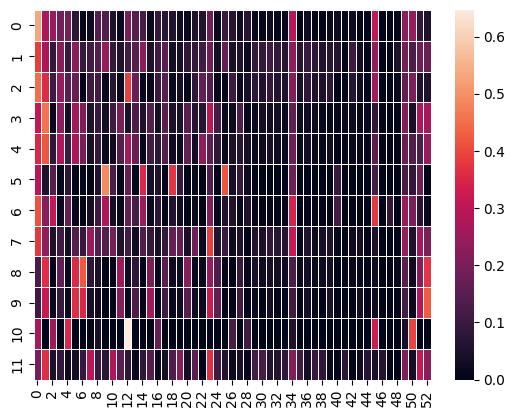

In [37]:
contingency_matrix = metrics.cluster.contingency_matrix(tm['tissue_discr'], all_anndata.obs['louvain'])
gen_heatmap(matrix = contingency_matrix)

# Sankey plots

In [38]:
n_performer_clust = len(all_anndata.obs.louvain.unique())
jump = 3
for i in range(0, n_performer_clust, jump):
    end_idx = i+jump
    plot_sankey(tm, all_anndata, field_og = 'cluster.ids', field_pred = 'louvain', filename = f"sankey_plots/subset/sankey{i}_{end_idx}", from_cls = i, to_cls = end_idx)

Sankey plot w.r.t. ground truth clusters and clusters resulting from Performer

In [ ]:
plot_sankey(tm, all_anndata, field_og = 'cluster.ids', field_pred = 'louvain', filename = f"sankey_plots/subset/sankey{0}_{n_performer_clust}", from_cls = 0, to_cls = n_performer_clust)
# Show the figure
HTML(filename=f"sankey_plots/all/sankey0_{n_performer_clust}.html")

Sankey plot w.r.t. ground truth tissues and clusters resulting from Performer

In [ ]:
plot_sankey(tm, all_anndata, field_og = 'tissue_discr', field_pred = 'louvain', filename = f"sankey_plots/subset/tissue_sankey{0}_{n_performer_clust}", from_cls = 0, to_cls = n_performer_clust)
# Show the figure
HTML(filename=f"sankey_plots/all/tissue_sankey0_{n_performer_clust}.html")

Sankey plot w.r.t. ground truth cell ontology class and clusters resulting from Performer

In [ ]:
plot_sankey(tm, all_anndata, field_og = 'cell_ontology_class_discr', field_pred = 'louvain', filename = f"sankey_plots/subset/cell_ont_sankey{0}_{n_performer_clust}", from_cls = 0, to_cls = n_performer_clust)
# Show the figure
HTML(filename=f"sankey_plots/all/cell_ont_sankey0_{n_performer_clust}.html")